# Pruebas de Normalidad con Python

In [71]:
import numpy as np 
import pylab 
import scipy.stats as ss

In [75]:
np.random.seed(0)
measurements = np.random.normal(size=100) #N(0,1)
#measurements = np.random.normal(loc = 20, scale = 5, size=100) #N(20,5)

### Histograma

(array([ 1.,  5.,  7., 13., 17., 18., 16., 11.,  7.,  5.]),
 array([-2.55298982, -2.07071537, -1.58844093, -1.10616648, -0.62389204,
        -0.1416176 ,  0.34065685,  0.82293129,  1.30520574,  1.78748018,
         2.26975462]),
 <a list of 10 Patch objects>)

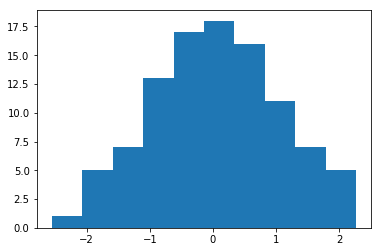

In [80]:
pylab.hist(measurements,bins=10)

### Diagrama de caja o boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2e41a7d7b8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2e41a7de48>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2e41a7d3c8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2e41ad3518>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2e41ad3860>],
 'means': []}

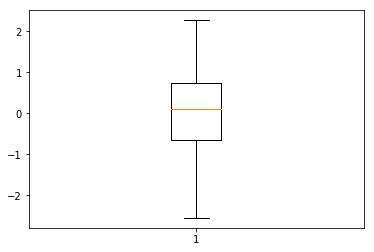

In [81]:
pylab.boxplot(measurements)

### Q-Q-Plot

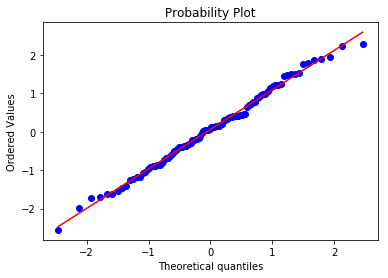

In [82]:
ss.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

## Contrastes de hipótesis:

Relacionado con la distribución normal, vamos a plantear diversos contrastes de hipótesis para entender la aceptación o rechazo de la H0.
<br>Suponemos:
<br>H0: la distribución es normal.
<br>H1: los datos no siguen una normal.

### Contraste Kolmogorov-Smirnov (de normalidad p-valor)

Queremos saber si la altura de los habitantes de una ciudad sigue una distribución normal. 
Para ello hemos tomado una muestra de 80 alturas.

In [59]:
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt

df = pd.read_csv("PruebasNorm_datos1.csv")
df.head()


,Altura
0,180.557434
1,159.483093
2,175.545660
3,149.063787
4,140.354941


In [60]:
len(df)

80

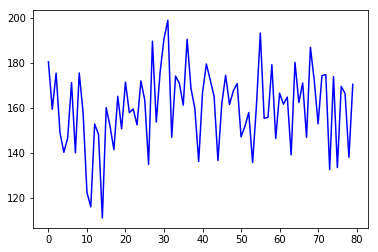

In [61]:
x = np.arange(len(df))
plt.plot(x,df['Altura'],"b")
plt.show()

In [62]:
df_sort = df['Altura'].sort_values()
df_sort.head()

14    111.174872
11    116.100559
10    122.536120
73    132.668577
75    133.543554
Name: Altura, dtype: float64

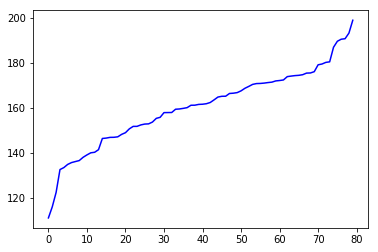

In [63]:
x_sort = np.arange(len(df_sort))
plt.plot(x_sort,df_sort,"b")
plt.show()

In [64]:
df.max()-df.min()

Altura    87.866955
dtype: float64

(array([ 1.,  1.,  1.,  0.,  1.,  5.,  5.,  0.,  7.,  7.,  6., 10.,  7.,
        11.,  8.,  4.,  0.,  2.,  3.,  1.]),
 array([111.17487191, 115.56821965, 119.96156739, 124.35491513,
        128.74826287, 133.14161061, 137.53495836, 141.9283061 ,
        146.32165384, 150.71500158, 155.10834932, 159.50169706,
        163.8950448 , 168.28839254, 172.68174029, 177.07508803,
        181.46843577, 185.86178351, 190.25513125, 194.64847899,
        199.04182673]),
 <a list of 20 Patch objects>)

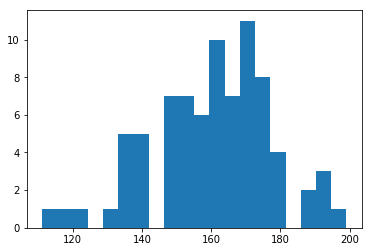

In [65]:
pylab.hist(df['Altura'],bins=20)

In [66]:
media, desviacion = ss.norm.fit(df["Altura"])

print(media) # media = 160,37
print(desviacion) # desviacion = 17,41

160.37437801610426
17.413434203608496


Si lo ajustamos a una normal, parece ser que encajaría con una distribución normal de media 160,37 y desviación típica 17,41.

Hemos hecho un ajuste, pero no sabemos cómo de bueno es realmente. Realizamos Kolmogorov-Smirnov.

In [67]:
d, pvalor = ss.kstest(df["Altura"],"norm",args=(media,desviacion))
# o alternativamente hace lo mismo
#d, pvalor = ss.ktest(df["Altura"],lambda x: ss.norm.cdf(x,media,desviacion))

In [68]:
d

0.07029940318559086

In [69]:
pvalor

0.8240450968769732

La estadística d es la distancia máxima absoluta entre los CDF (funciones de distribución) de las dos vbles. Cuanto más cercano esté este número a 0, más probable es que las dos muestras se extraigan de la misma distribución.

Hemos obtenido un pvalor grande por lo que podemos aceptar la hipotesis nula y concluir que estos datos sí que se podrían ajustar a una normal. Es decir, no podemos rechazarla, lo que no significa que haya que dar por hecho que es real.

(Importante tener en cuenta que el pvalor no es una probabilidad, es un indicador)

### Shapiro-Wilk Test

Suponemos:
<br>H0: la distribución es normal.
<br>H1: los datos no siguen una normal.

In [83]:
stat, p = ss.shapiro(measurements)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No hay evidencias para rechazar H0. Por tanto se puede asumir que la distribución es normal')
else:
    print('Hemos encontrado evidencias de que no es normal')

stat=0.993, p=0.869
No hay evidencias para rechazar H0. Por tanto se puede asumir que la distribución es normal


### D’Agostino’s K^2 Test

In [84]:
stat, p = ss.normaltest(measurements)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('No hay evidencias para rechazar H0. Por tanto se puede asumir que la distribución es normal')
else:
    print('Hemos encontrado evidencias de que no es normal')

stat=0.454, p=0.797
No hay evidencias para rechazar H0. Por tanto se puede asumir que la distribución es normal


### Anderson-Darling Test

In [85]:
result = ss.anderson(measurements)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=0.181
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


In [ ]:
# ss.proportions_ztest(x, n, p_null, alternative = 'larger') # para proporciones

In [ ]:
# ss.ztest(data, value = 100, alternative = "larger") # para h0 media=100

In [ ]:
# ss.ztest(poblacion1, poblacion2) # para medias de dos poblaciones